# Introduction

The RMS Titanic was a liner that was set for New York City, having embarked from Southampton, UK on April 10, 1912, when four days after its departure the ship was struck by an iceberg. Within 3 hours of its collision, the Titanic was completely sunk. 2,224 people were on board, representing all levels of the socioeconomic ladder. Only 710 passengers and crew survived. 

Since the Titanic's sinking, much conversation about the tragic event has revolved around the survival rates of its passengers. Why did some survive and some perish? We'll use this dataset to investigate.

# Getting Started

Let's load the titanic dataset. 

We'll import pandas as we'll be loading the original csv file into a Pandas dataframe. Then we'll get a short preview of the first five rows of the dataset, which will help us get a better understanding of what kind of data we're dealing with.

In [1]:
import pandas as pd
from pandas import Series,DataFrame

titanic_df = pd.read_csv('train.csv')

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Wrangling

I'd like to know exactly how many rows, columns, and non-null cells (cells that actually have data) there are, so let's find out.

In [2]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


There are 12 columns in the dataset, but we were already able to see that by simply getting a preview of the data. There are 891 total rows in the dataset, however not every passenger has data available for every column. We have age data for 714 passengers, Cabin data for only 204 passengers, and Embarked data for all but two individuals.

As only 204 passengers have Cabin data, we don't feel it would be all that useful or accurate for analysis. Thus, we will delete the Cabin data from the dataframe.

In [3]:
del titanic_df['Cabin']

Let's look at the dataframe one more time to make sure the Cabin column is deleted.

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Looks good.

Regarding the rows that have missing data in the "Age" and "Embarked" columns, I'll be keeping the data as is. Considering the fact that the data visualization libraries, Matplotlib and Seaborn (which is what I'll be using for visualization throughout this project) ignore missing values (such as "NaN") when outputting visualizations, it is of no detriment to me to keep those missing values for this specific project. 

# Questions to Ask

In this project, I'll first want to answer basic questions about the dataset. It's important to know your dataset well before moving on to answer more challenging questions.

First let's answer:

    1) Who exactly were the passengers of the Titanic? Specifically, what is the gender/class/age makeup of the Titanic?
    2) Where were these passengers embarking from?
    3) How many people were traveling alone and with family?
    
Once we've answered these questions, we'd like to answer the question that drives us to investigate this dataset:

    4) What factors affected the survivability rates of passengers?

# The Passengers of the Titanic

Let's answer our first question - who exactly were the passengers of the titanic? Let's import some packages that we'll use for the rest of this project, primarily for data visualization.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
# Function to add values on top of bars in countplots

def annotate_bar(ax):
    for p in ax.patches:
        ax.annotate(np.round(int(p.get_height())), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 4), textcoords='offset points')

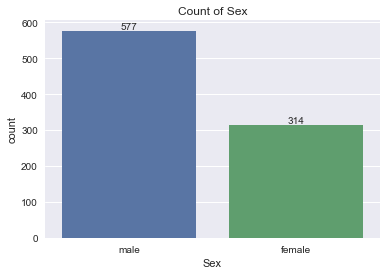

In [7]:
ax = sns.countplot(titanic_df['Sex'])
annotate_bar(ax)
sns.plt.title('Count of Sex')

There were 577 men and 314 women on the Titanic. Let's see how the gender breaks down by class.

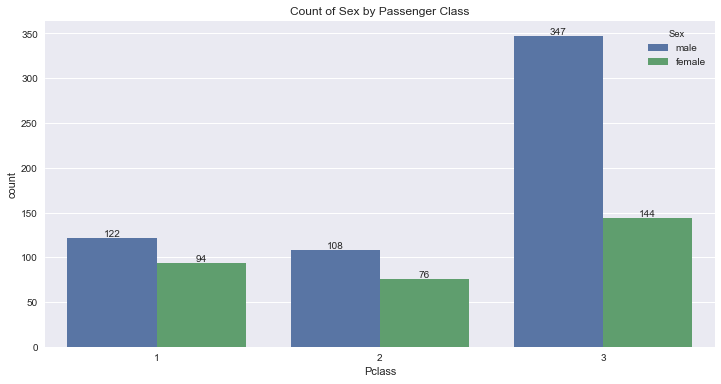

In [8]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='Pclass', data=titanic_df, hue='Sex')
annotate_bar(ax)
sns.plt.title('Count of Sex by Passenger Class')

While men outnumber women in all classes, it's in the third class where the gender disparity is most evident. 

Considering that Birkenhead Drill was reported to have played a major reason behind why so many men perished in the disaster - the "women and children first" policy that gave them access to the life boats first - it would be insightful to see the men/women/child breakdown of the Titanic.

Let's create a new column, title 'Person', that has the following values: "male", "female", "child". Anyone under the age of 16 will obtain the label of "child".

In [9]:
def male_female_child(passenger):
    age,sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex
                
titanic_df['Person'] = titanic_df[['Age', 'Sex']].apply(male_female_child,axis=1)


Let's take a look at the dataframe now to make sure this worked.

In [10]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,male


With our new column, we can now bring children into our data analysis. Let's look at the number of men, women, and children now.

In [11]:
titanic_df['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

There are 537 adult men on the Titanic, 271 adult women, and 83 children. 

Let's make another count plot looking at passenger class.

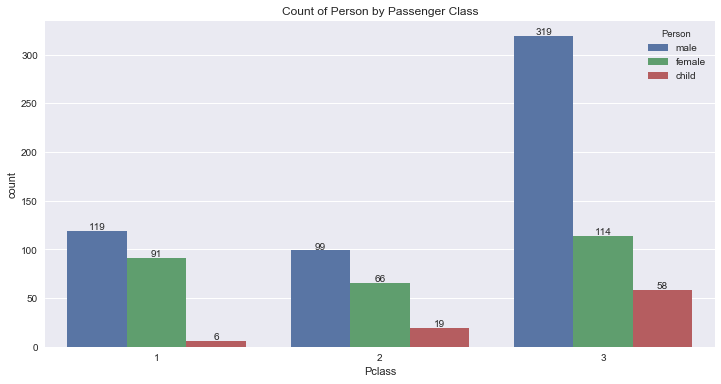

In [12]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='Pclass', data=titanic_df, hue='Person')
annotate_bar(ax)
sns.plt.title('Count of Person by Passenger Class')

Of the 83 children in the dataset, 58 of them were in the third class. 

Let's make a histogram for the Age data so we can see what the age distribution on the Titanic was like.

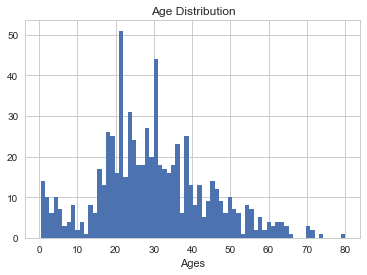

In [40]:
titanic_df['Age'].hist(bins=70)
sns.plt.title('Age Distribution')
sns.plt.xlabel('Ages')

It looks like most people were around the ages of 16-35. 

It would be interesting to see how the shapes of the age distributions compare to one another when breaking age distribution down by sex and passenger class. Let's use a KDE (Kernel Density Estimation) plot to do that.

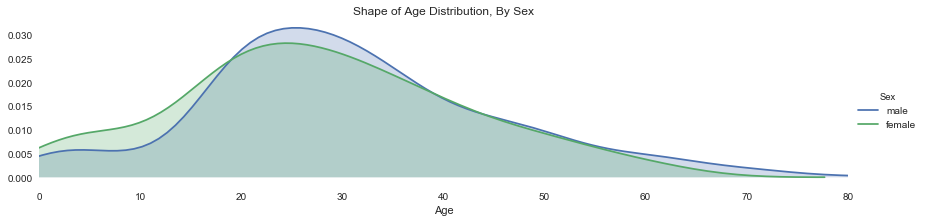

In [35]:
sns.set_style("whitegrid", {'axes.grid' : False})
g = sns.FacetGrid(titanic_df, hue='Sex', aspect=4) # Sets the empty FacetGrid
g.map(sns.kdeplot, "Age", shade='True').add_legend() # Fills the grid with the kde plot and the legend
g.set(xlim=(0, titanic_df['Age'].max()))
sns.despine(left=True, bottom=True)
sns.plt.title('Shape of Age Distribution, By Sex')

It looks like there were more female children than male children on the Titanic.

The fact that there were more adult men than women becomes evident when the distribution hits Age 20. From there onward, the male kde plot overtakes the female kde plot most of the time, especially between the ages of 20-35 and 60+.

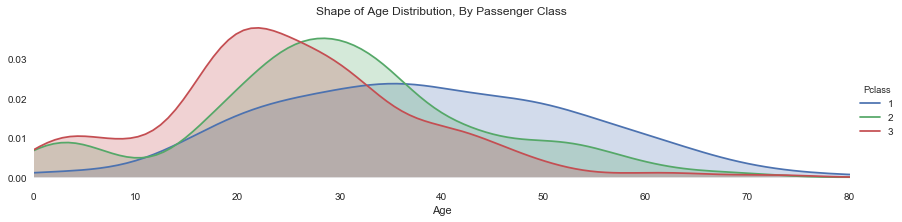

In [36]:
sns.set_style("whitegrid", {'axes.grid' : False})
g = sns.FacetGrid(titanic_df, hue='Pclass', aspect=4) # Sets the empty FacetGrid
g.map(sns.kdeplot, "Age", shade='True').add_legend() # Fills the grid with the kde plot and the legend
g.set(xlim=(0, titanic_df['Age'].max()))
sns.despine(left=True, bottom=True)
sns.plt.title('Shape of Age Distribution, By Passenger Class')


While the first class has a rather normal distribution of ages, the second and third classes are somewhat skewed to the right. Those classes appear to have had overall younger populations than the first, hence why they look positively skewed.

# Embarked Data

We have a much better idea now of who exactly the passengers of the Titanic were. Next, let's see where they came from. Let's take a look a the data again.

In [16]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,male


The Embarked column is made up of "S" for Southampton, "C" for Cherbourg, and "Q" for Queenstown. Let's replace those individual letters with their actual city names.

In [17]:
titanic_df["Embarked"] = titanic_df['Embarked'].map({"S": "Southampton", "C": "Cherbourg", "Q": "Queenstown"})

Let's take a look at the dataset again to make sure this worked.

In [18]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Southampton,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Cherbourg,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Southampton,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Southampton,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Southampton,male


Looks good. Let's check how many people embarked from each city.

In [19]:
titanic_df['Embarked'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: Embarked, dtype: int64

It looks like the majority of passengers, 644 of them, came from Southampton, UK, which is where the Titanic embarked from. After embarking from Southampton, the Titanic picked up 168 more passengers from Cherbourg, France and an extra 77 passengers from Queenstown, Ireland (now called Cobh) before heading west to the United States.

Let's make a count plot so we can breakdown the city of departure by passenger class.

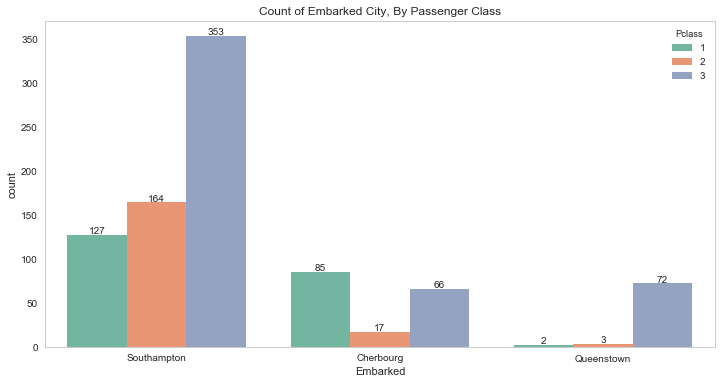

In [20]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='Embarked', data=titanic_df, hue='Pclass', palette='Set2')
annotate_bar(ax)
sns.plt.title('Count of Embarked City, By Passenger Class')

It's interesting to see that only 5 of the 77 people from Queenstown were in the first or second class. Southampton's distribution isn't surprising as fare prices are meant to be cheaper the higher passenger class you go. Cherbourg actually has more people in first class than third, which is interesting as well.

# Traveling Alone or with Family

Lastly, before we look at the predictors of survival, let's see how many people were traveling alone and with family. 

Let's start by creating a new column called "Alone". Our "Alone" column will be the sum of the "SibSp" and "Parch" columns. "SibSp" indicates how many siblings they came with, and if they came with a spouse. "Parch" indicates how many parents and children the passenger embarked with. 

In [21]:
titanic_df['Alone'] = titanic_df['SibSp'] + titanic_df['Parch']

If the "Alone" column is greater than 0, we know the passenger came with a family member. If it's 0, they came alone. We'll utilize the .apply function to change the 'Alone' column to be filled with "With Family" or "Alone".

In [22]:
def alonestatus(alonen):
    if alonen > 0:
        return "With Family"
    else:
        return "Alone"

titanic_df['Alone'] = titanic_df['Alone'].apply(alonestatus)

Now let's make sure that worked.

In [23]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Southampton,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Cherbourg,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Southampton,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Southampton,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Southampton,male,Alone


Great. Let's make a simple count plot to compare the number of people that were Alone with those that were with family.

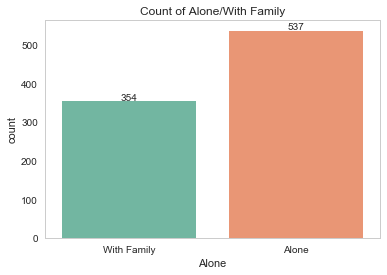

In [24]:
ax = sns.countplot(x='Alone', data=titanic_df, palette='Set2')
annotate_bar(ax)
sns.plt.title('Count of Alone/With Family')

So more people on the Titanic were traveling alone, but would this count plot looked if set hue to 'Pclass'?

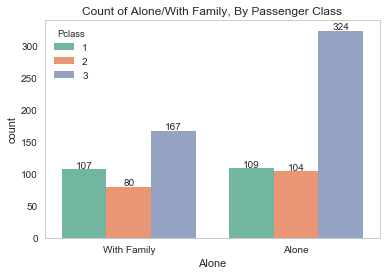

In [25]:
ax = sns.countplot(x='Alone', data=titanic_df, hue='Pclass', palette='Set2')
annotate_bar(ax)
sns.plt.title('Count of Alone/With Family, By Passenger Class')

Class 1 had a 50-50 split when it came to people traveling alone and with family. "Alone" slightly edges out "With Family" in class 2, but people traveling alone outnumber passengers with family almost 2:1 in the third class. 

Let's see how this would look if we broke it down by man, woman and child, instead of passenger class.

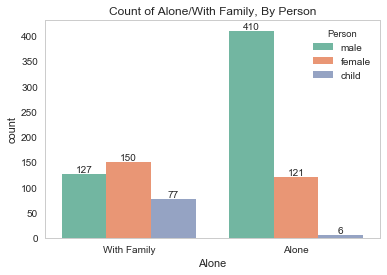

In [26]:
ax = sns.countplot(x='Alone', data=titanic_df, hue='Person', palette='Set2')
annotate_bar(ax)
sns.plt.title('Count of Alone/With Family, By Person')

The most significant thing to note here is that, compared to women and children, men were disproportionately traveling alone. The reason behind this may be because many of the men on the Titanic were young men hoping to move to New York, work and start a new life. 

# Factors Behind Survival Rates

Now, let's move on to answering an important question: what factors affected survival rates? 

We'll analyze and see if there was any correlation between the following factors and survival rates:

    1) Gender
    2) Class
    3) Traveling Alone or With Family
    4) Age

We'll also combine a few of these factors for closer analysis.

Let's start by simply looking at how many people survived and how many people didn't.

In the following count plot, 0 and 1 mean "didn't survive" and "survived" respectively.

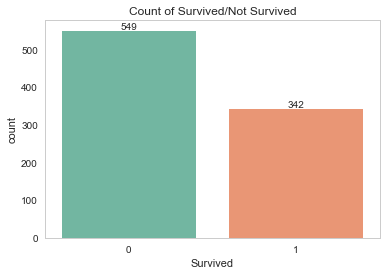

In [27]:
ax = sns.countplot(x='Survived', data=titanic_df, palette='Set2')
annotate_bar(ax)
sns.plt.title('Count of Survived/Not Survived')

We can see that more people lost their lives than survived the disaster. 

Why did some people make it and not others? Perhaps passenger class was a factor. Let's create a factor plot and take a closer look.

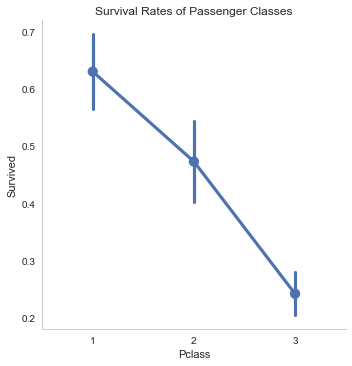

In [28]:
sns.factorplot(x="Pclass", y="Survived", data=titanic_df, size=5)
sns.plt.title('Survival Rates of Passenger Classes')

It should be noted that in the factor plot, the dots represent means, and the vertical lines going through them represent confidence intervals. 

This factor plot shows us that survival rates go down as as you go from the first class to the third, with people in the third class having a significantly lower survival rate than the other two. 

When it came to allocating resources for survival, was there a significant preference for people in the first class? We can't be too sure, as the very low survival rate for the third class may be due to the large amount of men in it, who were affected by the Birkenhead Drill. Let's set hue to "person" and get a closer look.

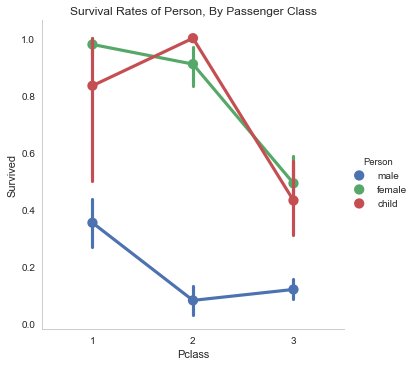

In [29]:
sns.factorplot(x="Pclass", y="Survived", hue='Person', data=titanic_df, size=5)
sns.plt.title('Survival Rates of Person, By Passenger Class')

By setting the hue to "Person", we can see that being in the third class, regardless if you were a man, woman, or child, was not a favorable factor for your survival.

Also, we can see that being a man, no matter your passenger class, was very likely to negatively affect your chances of survival. 

What sort of affect did age have on one's survival? Let's use the Seaborn lmplot function to analyze that.

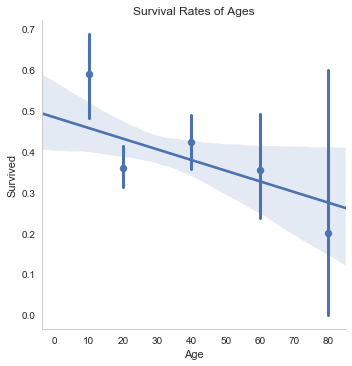

In [30]:
age_groups = [10, 20, 40, 60, 80]

sns.lmplot(x='Age', y='Survived', data=titanic_df, x_bins=age_groups)
sns.plt.title('Survival Rates of Ages')

This lmplot shows that, generally, the older a passenger was, the less likely they were to survive. 

Let's see if this applies across class.

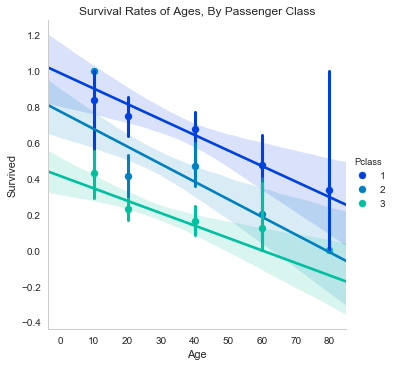

In [31]:
sns.lmplot(x='Age', y='Survived', data=titanic_df,  x_bins=age_groups, hue='Pclass', palette='winter')
sns.plt.title('Survival Rates of Ages, By Passenger Class')

What we observed in the earlier lmplot - old age was a negative factor for one's survival - was consistent in every passenger class.

Let's get a closer look at the combination of age and gender with survival rates.

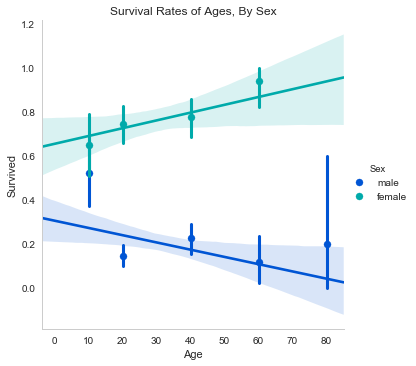

In [32]:
sns.lmplot(x='Age', y='Survived', data=titanic_df,  x_bins=age_groups, hue='Sex', palette='winter')
sns.plt.title('Survival Rates of Ages, By Sex')

This is really interesting: While the observation we've made about old age being apparently inversely proportional with the survival rate, that actually only applies to men, in this case. We see that with women, the older a passenger was, the more likely they were to survive.

Why was this case? It may be due to older women having priority over younger women when the Birkenhead Drill was carried out.

Lastly, let's see if traveling alone increased or decreased the chances of survival.

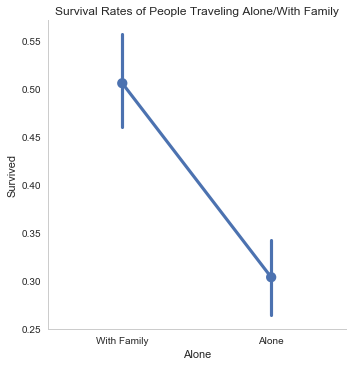

In [33]:
sns.factorplot(x="Alone", y="Survived", data=titanic_df, size=5)
sns.plt.title('Survival Rates of People Traveling Alone/With Family')

From this factor plot, we can see that survival rates are higher when passengers were traveling with family. Let's break it down by "Person", though, to get a more detailed look.

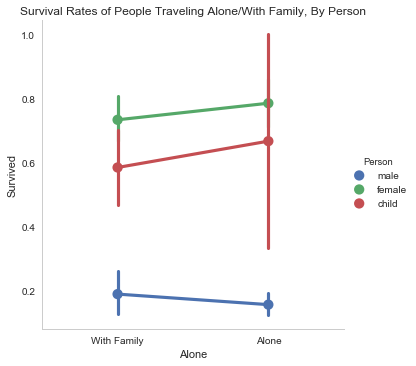

In [34]:
sns.factorplot(x="Alone", y="Survived", hue='Person', data=titanic_df, size=5)
sns.plt.title('Survival Rates of People Traveling Alone/With Family, By Person')

We see here that with women and children who were alone, there's an actual minor increase in the survival rate. For men, their chances of survival dip when traveling alone.

# Conclusion

We tackled this dataset with the aim of answering the question "Why did some survive and some perish?" Through our analysis, we think we've been able to identify factors that affected a passenger's chances of survival.

First, passengers in the third class were a lot less likely to survive the disaster than their counterparts in the second and first classes.

Second, men were significantly more likely to perish than women and children, regardless of their passenger class. This is very likely due to the Birkenhead Drill.

Third, we've observed that old age negatively impacted one's survival rate, across all passenger classes. However, this trend does not cross over when you look at strictly gender. While this trend still applies to men, women experienced the exact opposite - older women had better survival rates than younger women. This could be due to the Birkenhead Drill prioritizing older women.

Fourth, and lastly, there doesn't appear major differences between traveling alone or with family when you break it down by men, women, and children. There appears to be a minor increase in survival rate for women and children if they traveled alone, and the opposite for men.

Regarding any limitations with the data: It would have been ideal if this dataset included data on the rest of the passengers of the Titanic. There were 2,224 passengers on board the Titanic, but the dataset we're using only has data on 891 passengers. This affects the accuracy of our conclusions as we haven't analyzed all 2,224 passengers.

# References

1. http://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots